Loading and preparing data...

Training the model...
Model Accuracy: 80.8%


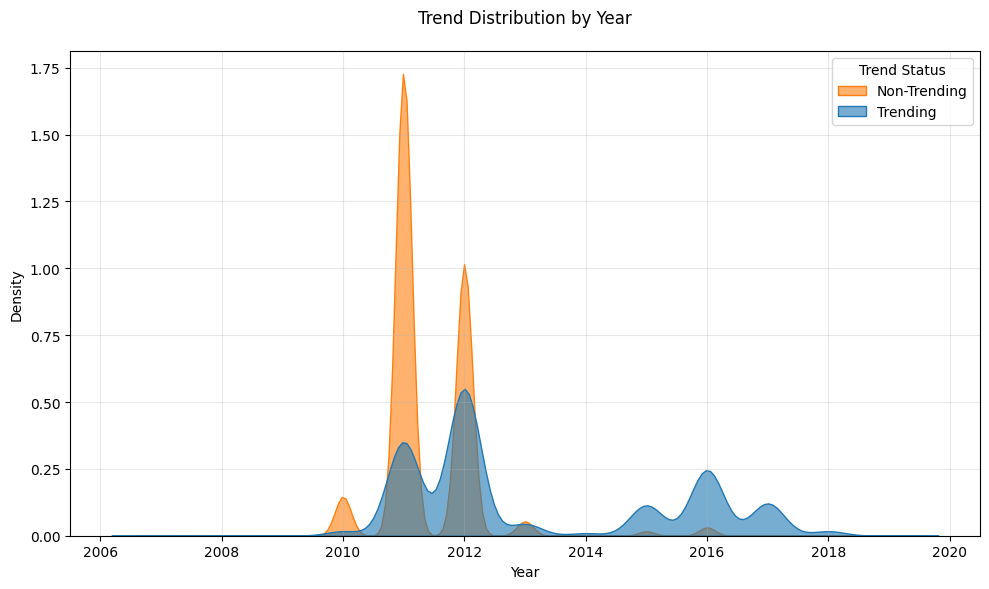

/var/folders/9d/h1bk5krx0958_6zs9bg4z9jc0000gn/T/ipykernel_59770/3876451191.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_trending', y="years_since_release", data=df,


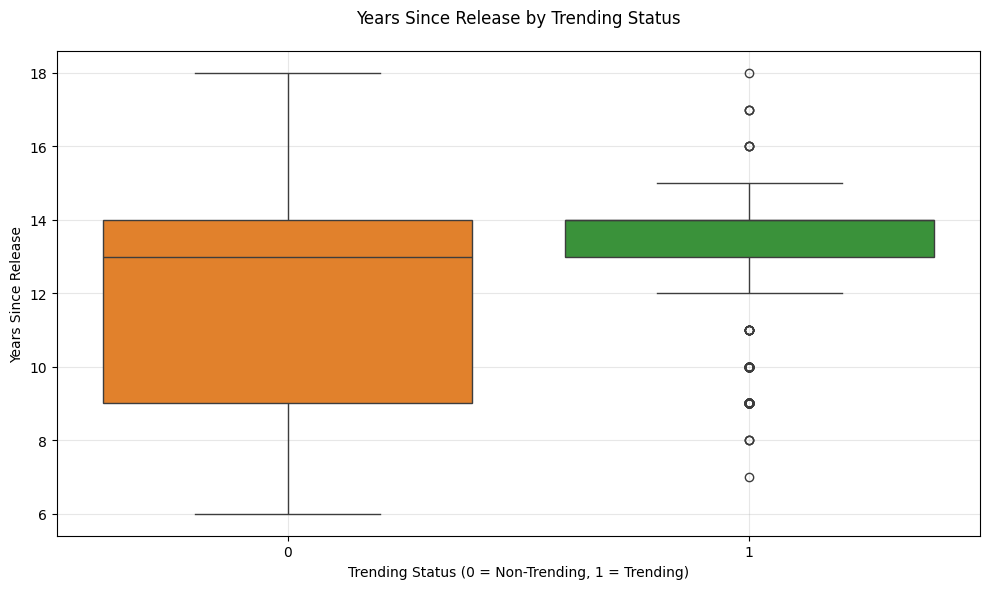

/var/folders/9d/h1bk5krx0958_6zs9bg4z9jc0000gn/T/ipykernel_59770/3876451191.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_trending', y='color_popularity', data=df,


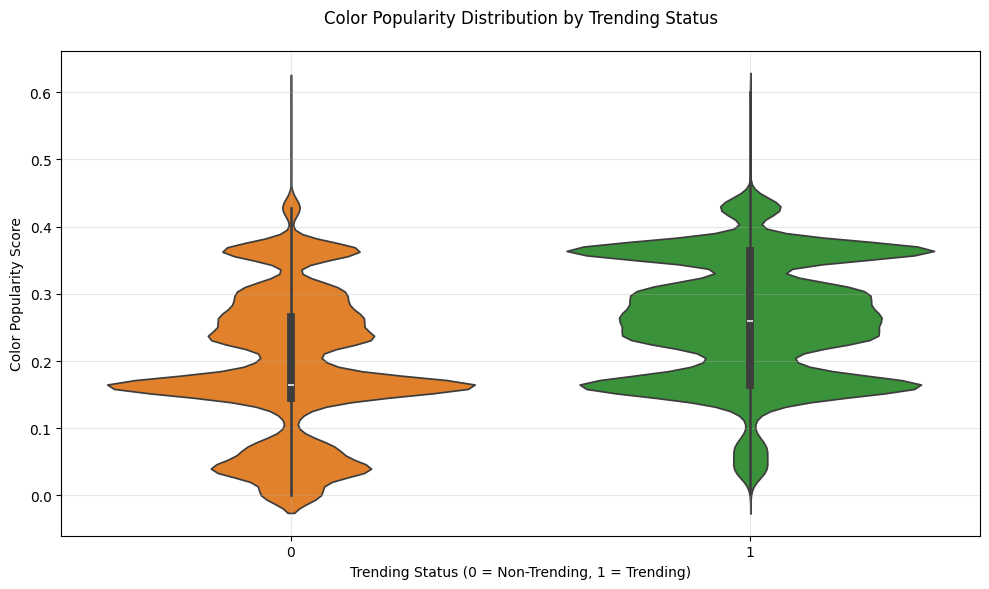

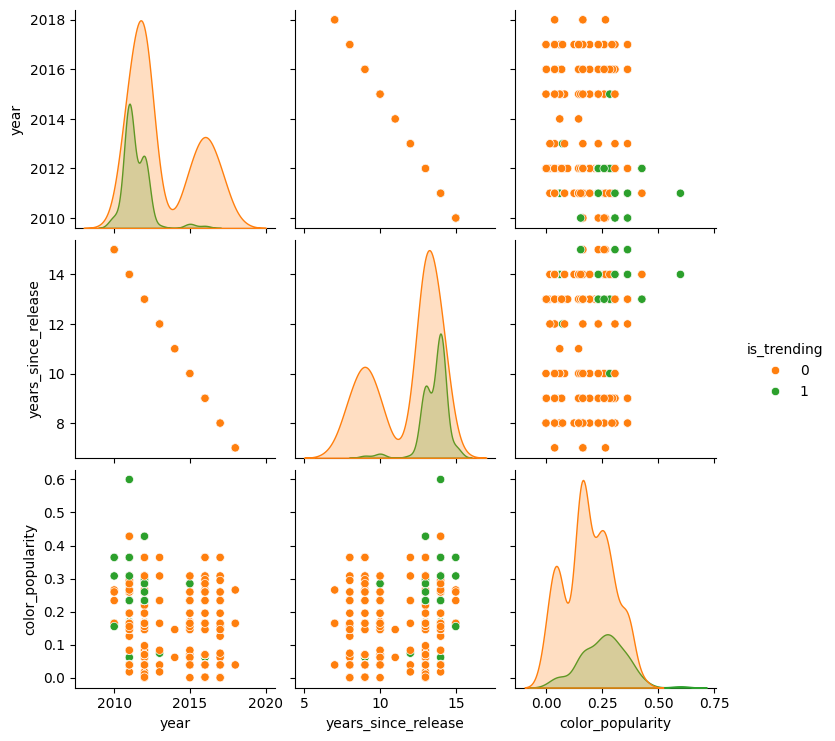

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def load_data():
    """Load and preprocess the dataset with two new features"""
    df = pd.read_csv("styles.csv", on_bad_lines='skip')
    current_year = pd.Timestamp.now().year

    # Create target variable
    df['is_trending'] = (
        (df['year'] == current_year) |
        (df['articleType'].isin(['Dress', 'Tshirts', 'Sports Shoes']))
    ).astype(int)

    # Convert is_trending to string for Seaborn compatibility
    df['is_trending'] = df['is_trending'].astype(str)

    # New Feature 1: Years Since Release
    df['years_since_release'] = current_year - df['year']

    # New Feature 2: Color Popularity Score
    color_popularity = df.groupby('baseColour')['is_trending'].apply(lambda x: x.astype(int).mean())
    df['color_popularity'] = df['baseColour'].map(color_popularity)

    features = ['year', 'years_since_release', 'color_popularity', 'is_trending']
    return df[features].dropna()

def train_model(df):
    """Train the Random Forest model"""
    X = df.drop('is_trending', axis=1)
    y = df['is_trending']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    print(f"Model Accuracy: {model.score(X_test, y_test):.1%}")
    return model, X, df

if __name__ == "__main__":
    print("Loading and preparing data...")
    data = load_data()

    print("\nTraining the model...")
    model, X, df = train_model(data)

    # KDE plot for Year Distribution
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='year', hue='is_trending', fill=True, common_norm=False, alpha=0.6)
    plt.title("Trend Distribution by Year", pad=20)
    plt.xlabel("Year")
    plt.ylabel("Density")
    plt.legend(title='Trend Status', labels=['Non-Trending', 'Trending'])
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('kde_trend_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Fixed Boxplot for Years Since Release
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_trending', y="years_since_release", data=df,
                palette={"0": "#ff7f0e", "1": "#2ca02c"})
    plt.title("Years Since Release by Trending Status", pad=20)
    plt.xlabel("Trending Status (0 = Non-Trending, 1 = Trending)")
    plt.ylabel("Years Since Release")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('boxplot_years_since_release.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Violin Plot for Color Popularity
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='is_trending', y='color_popularity', data=df,
                   palette={"0": "#ff7f0e", "1": "#2ca02c"})
    plt.title("Color Popularity Distribution by Trending Status", pad=20)
    plt.xlabel("Trending Status (0 = Non-Trending, 1 = Trending)")
    plt.ylabel("Color Popularity Score")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('violinplot_color_popularity.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Pairplot for Numerical Features (Sample 500 for Speed)
    sns.pairplot(df.sample(min(500, len(df)), random_state=42), hue="is_trending",
                 palette={"0": "#ff7f0e", "1": "#2ca02c"})
    plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')
    plt.show()
